In [1]:
# Recursive Feature Elimination (RFE) for Feature Selection

import pandas as pd
from kaggle_airbnb.preprocess import process_non, process_non_numeric_data

# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from matplotlib.pyplot import figure
from sklearn.ensemble import RandomForestClassifier




In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("../data/train.csv")
data_df = df.drop(columns=["id"])
feature_df = df.drop(columns=["id", "Decision"])

In [4]:
data_df = process_non(data_df)
data_df = process_non_numeric_data(data_df)
transformed_feature_df = data_df.drop(columns=["Decision"])

In [5]:

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 20):
		rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=i)
		model = RandomForestClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X = transformed_feature_df
y = data_df["Decision"]

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


>2 0.716 (0.019)
>3 0.759 (0.016)
>4 0.778 (0.015)
>5 0.799 (0.012)
>6 0.804 (0.017)
>7 0.800 (0.015)
>8 0.805 (0.012)
>9 0.795 (0.017)
>10 0.794 (0.015)
>11 0.800 (0.014)
>12 0.805 (0.014)
>13 0.807 (0.013)
>14 0.810 (0.015)
>15 0.807 (0.014)
>16 0.810 (0.014)
>17 0.811 (0.014)
>18 0.809 (0.014)
>19 0.812 (0.014)


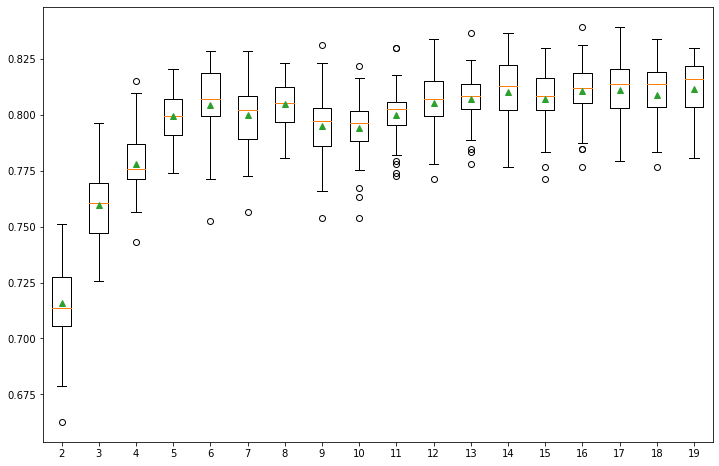

In [6]:
# plot model performance for comparison
figure(figsize = (12, 8))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [7]:
# define dataset
X = transformed_feature_df
y = data_df["Decision"]

# define RFE
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=7)

# fit RFE
rfe.fit(X, y)

# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 11.000
Column: 2, Selected False, Rank: 14.000
Column: 3, Selected False, Rank: 8.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 12.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 5.000
Column: 9, Selected False, Rank: 6.000
Column: 10, Selected False, Rank: 4.000
Column: 11, Selected False, Rank: 10.000
Column: 12, Selected False, Rank: 2.000
Column: 13, Selected False, Rank: 9.000
Column: 14, Selected False, Rank: 13.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected False, Rank: 7.000
Column: 19, Selected False, Rank: 3.000
